In [2]:
import pandas as pd                    
import numpy as np
import  matplotlib.pyplot as plt   
import seaborn as sns                  
import sklearn
import scipy
import math

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [3]:
data=pd.read_csv(r'dataset (1).csv')   #reading CSV File
data                                    #to get the information of data set

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


# Separating the data points where clear date is NULL


In [4]:
newData=pd.DataFrame(data[data["clear_date"].notnull()])     #slicing data where clear date is not null for training our model
newData.reset_index(drop=True, inplace=True)   #resetting index after removing null clear dates.
test=pd.DataFrame(data[data["clear_date"].isnull()])        #putting clear dates not null in train variable to test our model later !
test.reset_index(drop=True, inplace=True)     #resetting index of our train data serial wise.
#test
newData

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
4,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190709,20190710,20190725.0,USD,RV,1.0,NaN,84780.40,20190710.0,NAC6,1.929601e+09,0
39996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
39997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
39998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


# Preprocessing


In [5]:
[col for col in newData.columns if newData[col].isnull().sum() > 0]  #checking columns which have null 

['area_business', 'invoice_id']

In [6]:
const_cols =  [x for x in newData.columns if newData[x].nunique()<=1] #checking for constant columns (which have same value throught)
print(const_cols)

['posting_id', 'area_business', 'isOpen']


In [7]:
newData.drop(['area_business', 'posting_id'], axis='columns', inplace=True) #dropping area business and posting_id as they contain null and dont provide any info about our target variable   
newData 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,2253.86,20190914.0,NAA8,1.929874e+09,0
3,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,33133.29,20191113.0,NAH4,1.930148e+09,0
4,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,22225.84,20190924.0,CA10,2.960581e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190709,20190710,20190725.0,USD,RV,84780.40,20190710.0,NAC6,1.929601e+09,0
39996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,6766.54,20190815.0,NAH4,1.929744e+09,0
39997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,6120.86,20200219.0,NAA8,1.930537e+09,0
39998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,63.48,20191127.0,NAA8,1.930199e+09,0


In [8]:
newData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  total_open_amount       40000 non-null  float64
 13  baseline_create_date    40000 non-null  float64
 14  cust_payment_terms      40000 non-null

### Date Time Covnversion

In [9]:
newData['clear_date']=pd.to_datetime(newData['clear_date'])
#newData['posting_date' ]=newData['posting_date'].str.replace("-","").astype("int")
newData['posting_date']=pd.to_datetime(newData['posting_date'])
newData['baseline_create_date' ]=pd.to_datetime(newData['baseline_create_date'],format='%Y%m%d')
newData['document_create_date.1' ]=pd.to_datetime(newData['document_create_date.1'],format='%Y%m%d')
newData['due_in_date' ]=pd.to_datetime(newData['due_in_date'],format='%Y%m%d')
newData['document_create_date' ]=pd.to_datetime(newData['document_create_date'],format='%Y%m%d')

newData.info()
newData


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  total_open_amount       40000 non-null  float6

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,2020-01-26,2020-02-10,USD,RV,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,2019-07-22,2019-08-11,USD,RV,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,2019-09-14,2019-09-29,USD,RV,2253.86,2019-09-14,NAA8,1.929874e+09,0
3,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,2019-11-13,2019-11-28,USD,RV,33133.29,2019-11-13,NAH4,1.930148e+09,0
4,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-09-20,2019-09-20,2019-10-04,CAD,RV,22225.84,2019-09-24,CA10,2.960581e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,0200762301,C&S WH trust,2019-07-25,2019.0,1.929601e+09,2019-07-10,2019-07-09,2019-07-10,2019-07-25,USD,RV,84780.40,2019-07-10,NAC6,1.929601e+09,0
39996,U001,0200769623,WAL-MAR co,2019-09-03,2019.0,1.929744e+09,2019-08-15,2019-08-14,2019-08-15,2019-08-30,USD,RV,6766.54,2019-08-15,NAH4,1.929744e+09,0
39997,U001,0200772595,SAFEW associates,2020-03-05,2020.0,1.930537e+09,2020-02-19,2020-02-18,2020-02-19,2020-03-05,USD,RV,6120.86,2020-02-19,NAA8,1.930537e+09,0
39998,U001,0200726979,BJ'S llc,2019-12-12,2019.0,1.930199e+09,2019-11-27,2019-11-26,2019-11-27,2019-12-12,USD,RV,63.48,2019-11-27,NAA8,1.930199e+09,0


In [10]:
for col in newData.columns:   # For catagorical columns with relatively low unique value (<= 12) -- looking for value_counts
    if newData[col].nunique()<= 12:
        print(newData[col].value_counts())
        print('#########################')

U001    36190
CA02     3180
U013      501
U002      116
U005        9
U007        4
Name: business_code, dtype: int64
#########################
2019.0    34715
2020.0     5285
Name: buisness_year, dtype: int64
#########################
USD    36818
CAD     3182
Name: invoice_currency, dtype: int64
#########################
RV    39994
X2        6
Name: document type, dtype: int64
#########################
0    40000
Name: isOpen, dtype: int64
#########################


#### Preparing target column

In [11]:
newData["delay"] = (newData["clear_date"] - newData["due_in_date"]).apply(lambda x: x.days)    #calculating the delay days
# newData.insert(17,"delay",delayDays)                         #inserting delay days in target column i.e delay
newData.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  object        
 1   cust_number             40000 non-null  object        
 2   name_customer           40000 non-null  object        
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  datetime64[ns]
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  object        
 11  document type           40000 non-null  object        
 12  total_open_amount       40000 non-null  float6

In [12]:
newData.delay.min(),newData.delay.max()

(-89, 204)

#### Sorting the dataset 

In [13]:
newData.sort_values(by=['posting_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
2040,U001,0200769623,WAL-MAR,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,12491.86,2018-12-30,NAH4,1.928542e+09,0,1
10425,U001,0200794332,COST us,2019-01-15,2019.0,1.928535e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,51473.49,2018-12-30,NAAX,1.928535e+09,0,1
1086,U001,0200769623,WAL-MAR systems,2019-01-10,2019.0,1.928543e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,41840.55,2018-12-30,NAH4,1.928543e+09,0,-4
6184,U001,0200726979,BJ'S foundation,2019-01-15,2019.0,1.928540e+09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,58.18,2018-12-30,NAA8,1.928540e+09,0,1
22645,U001,0200707822,PUBLI us,2019-01-14,2019.0,1.928545e+09,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,110990.78,2018-12-30,NAA8,1.928545e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12493,U001,CCCA02,KRAFT corporation,2020-03-27,2020.0,1.930565e+09,2020-02-26,2020-02-24,2020-02-26,2020-04-01,USD,RV,30576.00,2020-02-26,NAG2,1.930565e+09,0,-5
21449,U001,0200726979,BJ'S corp,2020-03-12,2020.0,1.930569e+09,2020-02-26,2020-02-25,2020-02-26,2020-03-12,USD,RV,553.46,2020-02-26,NAA8,1.930569e+09,0,0
13646,U001,0200759878,SA corp,2020-03-13,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,49290.19,2020-02-27,NAH4,1.930574e+09,0,0
15552,U001,0200739044,PERFOR corporation,2020-03-16,2020.0,1.930574e+09,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,25143.02,2020-02-27,NAA8,1.930574e+09,0,3


In [14]:
newData.drop(['doc_id', 'document_create_date','document_create_date.1','baseline_create_date','invoice_id','document type','cust_number'], axis='columns', inplace=True) #dropping these columns as they dont provide any info about delay   
newData 

,business_code,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,delay
0,U001,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,NAH4,0,1
1,U001,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,NAD1,0,-3
2,U001,MDV/ trust,2019-12-30,2019.0,2019-09-14,2019-09-29,USD,2253.86,NAA8,0,92
3,U001,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,NAH4,0,-3
4,CA02,THE corporation,2019-12-04,2019.0,2019-09-20,2019-10-04,CAD,22225.84,CA10,0,61
...,...,...,...,...,...,...,...,...,...,...,...
39995,U001,C&S WH trust,2019-07-25,2019.0,2019-07-10,2019-07-25,USD,84780.40,NAC6,0,0
39996,U001,WAL-MAR co,2019-09-03,2019.0,2019-08-15,2019-08-30,USD,6766.54,NAH4,0,4
39997,U001,SAFEW associates,2020-03-05,2020.0,2020-02-19,2020-03-05,USD,6120.86,NAA8,0,0
39998,U001,BJ'S llc,2019-12-12,2019.0,2019-11-27,2019-12-12,USD,63.48,NAA8,0,0


# Splitting Data

In [15]:

# Converting the newData into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e Delay

X = newData.drop('delay',axis=1)

# y --> contains only the target value 

y = newData['delay']

In [16]:
#splitting the data first into two part -- doing a 75:25 split i.e 10000 data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.25,random_state=0 , shuffle = False)

#### splitting x_inter_test into X_train and X_val

In [17]:
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [18]:
X_train.shape , X_val.shape , X_test.shape   #checking the shape of splitted data

((30000, 10), (5000, 10), (5000, 10))

# EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

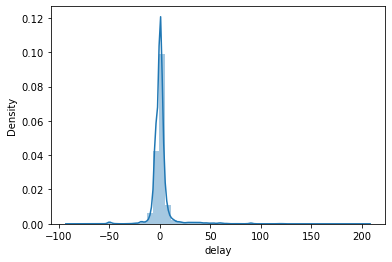

In [19]:
# to check the distribution of the target column 

sns.distplot(y_train)
#we can infer it is right 

In [20]:
y_train.min(),y_train.max()

(-89, 204)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

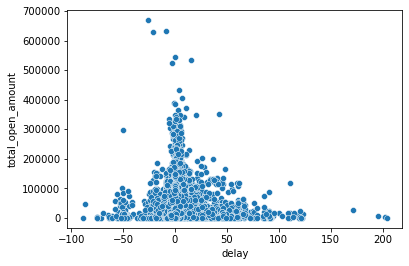

In [21]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")
#we can infer from the graph that it contains outliers and they should be treated accordingly.

### Outliers Detection and removal

In [22]:
mean=np.mean(y_train)       #calculating mean
std=np.std(y_train)         #calculating standard deviation 
print(mean)
print(std)

0.8209
10.793743088320243


#### Detecting number of outliers

In [23]:
#using Z score method of outlier removal  
threshold=3
outlier = []
for i in y_train:
    z= (i-mean)/std
    if z > threshold:
        outlier.append(i)
#print(outlier)
len(outlier)

597

#### IQR method of removal of outliers

In [24]:
X_train = X_train.merge(y_train,on = X_train.index)
Q1=y_train.quantile(0.25)
Q3=y_train.quantile(0.75)
print(Q1,Q3)

-3.0 2.0


In [25]:
IQR=Q3-Q1
IQR

5.0

In [26]:
lower_limit= Q1-1.5*IQR     #calculating the upper and lower bound
upper_limit= Q3+1.5*IQR
lower_limit,upper_limit

(-10.5, 9.5)

In [27]:
# main_train_x = X_train[((y_train<lower_limit)&(y_train>upper_limit))]
X_train =  X_train[(X_train["delay"]>lower_limit)]
X_train =  X_train[(X_train["delay"]<upper_limit)]
print(X_train.delay.min(),X_train.delay.max(),X_train.delay.mean(),X_train.shape)
y_train = X_train.delay
X_train = X_train.drop(columns=["key_0","delay"])

-10 9 -0.31836057293357867 (27717, 12)


In [28]:
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,name_customer,clear_date,buisness_year,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,isOpen,delay
0,0,U001,WAL-MAR corp,2020-02-11,2020.0,2020-01-26,2020-02-10,USD,54273.28,NAH4,0,1
1,1,U001,BEN E,2019-08-08,2019.0,2019-07-22,2019-08-11,USD,79656.60,NAD1,0,-3
2,3,U001,WAL-MAR foundation,2019-11-25,2019.0,2019-11-13,2019-11-28,USD,33133.29,NAH4,0,-3
3,5,U001,WAL-MAR in,2019-11-12,2019.0,2019-11-01,2019-11-16,USD,7358.49,NAH4,0,-4
4,6,U001,WAL-MAR corp,2019-06-18,2019.0,2019-06-07,2019-06-22,USD,15995.04,NAH4,0,-4
...,...,...,...,...,...,...,...,...,...,...,...,...
27712,29995,CA02,WAL-M associates,2019-08-30,2019.0,2019-08-15,2019-08-25,CAD,40348.76,CA10,0,5
27713,29996,U001,BJ'S associates,2019-10-09,2019.0,2019-09-23,2019-10-08,USD,94.89,NAA8,0,1
27714,29997,U001,RESTA systems,2019-03-27,2019.0,2019-03-07,2019-03-27,USD,887.31,NAD1,0,0
27715,29998,U001,WAL-MAR,2019-08-27,2019.0,2019-08-16,2019-08-31,USD,1898.20,NAH4,0,-4


# Feature Engineering

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27717 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   business_code       27717 non-null  object        
 1   name_customer       27717 non-null  object        
 2   clear_date          27717 non-null  datetime64[ns]
 3   buisness_year       27717 non-null  float64       
 4   posting_date        27717 non-null  datetime64[ns]
 5   due_in_date         27717 non-null  datetime64[ns]
 6   invoice_currency    27717 non-null  object        
 7   total_open_amount   27717 non-null  float64       
 8   cust_payment_terms  27717 non-null  object        
 9   isOpen              27717 non-null  int64         
dtypes: datetime64[ns](3), float64(2), int64(1), object(4)
memory usage: 2.3+ MB


### Label Encoding some columns

In [30]:
from sklearn.preprocessing import LabelEncoder
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])
X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])

In [31]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
1,1,U001
3,1,U001
5,1,U001
6,1,U001
...,...,...
29995,0,CA02
29996,1,U001
29997,1,U001
29998,1,U001


In [32]:
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])     #performing same on val and test set also
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])

In [33]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
1,1,U001
3,1,U001
5,1,U001
6,1,U001
...,...,...
29995,0,CA02
29996,1,U001
29997,1,U001
29998,1,U001


In [34]:
X_train.drop(['business_code'], axis =1,inplace=True)  #dropping business_code and using encoded one 
X_val.drop(['business_code'],axis=1 , inplace=True)
X_test.drop(['business_code'],axis=1 , inplace=True)

In [35]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27717 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   name_customer       27717 non-null  object        
 1   clear_date          27717 non-null  datetime64[ns]
 2   buisness_year       27717 non-null  float64       
 3   posting_date        27717 non-null  datetime64[ns]
 4   due_in_date         27717 non-null  datetime64[ns]
 5   invoice_currency    27717 non-null  object        
 6   total_open_amount   27717 non-null  float64       
 7   cust_payment_terms  27717 non-null  object        
 8   isOpen              27717 non-null  int64         
 9   business_code_enc   27717 non-null  int32         
dtypes: datetime64[ns](3), float64(2), int32(1), int64(1), object(3)
memory usage: 2.2+ MB


### Label encoding cust_payment_terms

In [36]:
cust_payment_terms_encoder = LabelEncoder()
cust_payment_terms_encoder.fit(X_train['cust_payment_terms'])

X_train['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_train['cust_payment_terms'])

In [37]:
X_train.drop(['cust_payment_terms'], axis =1,inplace=True)

In [38]:
# finding what are the new catagories in the validation set
diff = set(X_val['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)  #for adding unseen values

# adding them to the classess variable // 
for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)
    
    
diff = set(X_test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)  #for adding unseen values

for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)

In [39]:
X_val['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(X_test['cust_payment_terms'])

In [40]:
X_val.drop(['cust_payment_terms'],axis=1 , inplace=True)
X_test.drop(['cust_payment_terms'],axis=1 , inplace=True)

### Label encoding invoice_currency

In [41]:
invoice_currency_encoder = LabelEncoder()
invoice_currency_encoder.fit(X_train['invoice_currency'])

X_train['invoice_currency_enc'] = invoice_currency_encoder.transform(X_train['invoice_currency'])
X_val['invoice_currency_enc'] = invoice_currency_encoder.transform(X_val['invoice_currency'])
X_test['invoice_currency_enc'] = invoice_currency_encoder.transform(X_test['invoice_currency'])

In [42]:
X_train[['invoice_currency_enc','invoice_currency']]

,invoice_currency_enc,invoice_currency
0,1,USD
1,1,USD
3,1,USD
5,1,USD
6,1,USD
...,...,...
29995,0,CAD
29996,1,USD
29997,1,USD
29998,1,USD


In [43]:
X_train.drop(['invoice_currency'], axis =1,inplace=True)
X_val.drop(['invoice_currency'],axis=1 , inplace=True)
X_test.drop(['invoice_currency'],axis=1 , inplace=True)

### Target encoding name_customer

In [44]:
means = X_train.merge(y_train , on = X_train.index ).groupby('name_customer')['delay'].mean()
means_val = X_val.merge(y_val , on = X_val.index ).groupby('name_customer')['delay'].mean()
means_test = X_test.merge(y_test , on = X_test.index ).groupby('name_customer')['delay'].mean()
means

name_customer
17135 associates       -10.0
236008 associates       -3.0
99 CE                    2.0
99 CE associates         2.0
99 CE corporation        1.0
                        ... 
YEN BROS                 0.0
YEN BROS corp            0.0
YEN BROS corporation     0.0
YEN BROS llc            -2.0
ZIYAD  us                6.0
Name: delay, Length: 3108, dtype: float64

In [45]:
X_train['name_customer'] = X_train['name_customer'].map(means)
X_val['name_customer'] = X_val['name_customer'].map(means_val)
X_test['name_customer'] = X_test['name_customer'].map(means_test)
X_train["name_customer"]

0       -2.879336
1       -4.666667
3       -2.838915
5       -2.594225
6       -2.879336
           ...   
29995    6.473684
29996    1.108911
29997    0.090909
29998   -2.750369
29999   -2.594225
Name: name_customer, Length: 27717, dtype: float64

<AxesSubplot:xlabel='delay', ylabel='name_customer'>

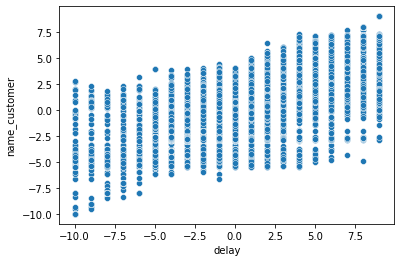

In [46]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="name_customer")

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27717 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   name_customer           27717 non-null  float64       
 1   clear_date              27717 non-null  datetime64[ns]
 2   buisness_year           27717 non-null  float64       
 3   posting_date            27717 non-null  datetime64[ns]
 4   due_in_date             27717 non-null  datetime64[ns]
 5   total_open_amount       27717 non-null  float64       
 6   isOpen                  27717 non-null  int64         
 7   business_code_enc       27717 non-null  int32         
 8   cust_payment_terms_enc  27717 non-null  int32         
 9   invoice_currency_enc    27717 non-null  int32         
dtypes: datetime64[ns](3), float64(3), int32(3), int64(1)
memory usage: 2.0 MB


In [48]:
X_train.drop(['clear_date'], axis =1,inplace=True)
X_val.drop(['clear_date'],axis=1 , inplace=True)
X_test.drop(['clear_date'],axis=1 , inplace=True)

In [49]:
X_train.drop(['posting_date'], axis =1,inplace=True)
X_val.drop(['posting_date'],axis=1 , inplace=True)
X_test.drop(['posting_date'],axis=1 , inplace=True)

X_train.drop(['due_in_date'], axis =1,inplace=True)
X_val.drop(['due_in_date'],axis=1 , inplace=True)
X_test.drop(['due_in_date'],axis=1 , inplace=True)

# Feature Selection

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

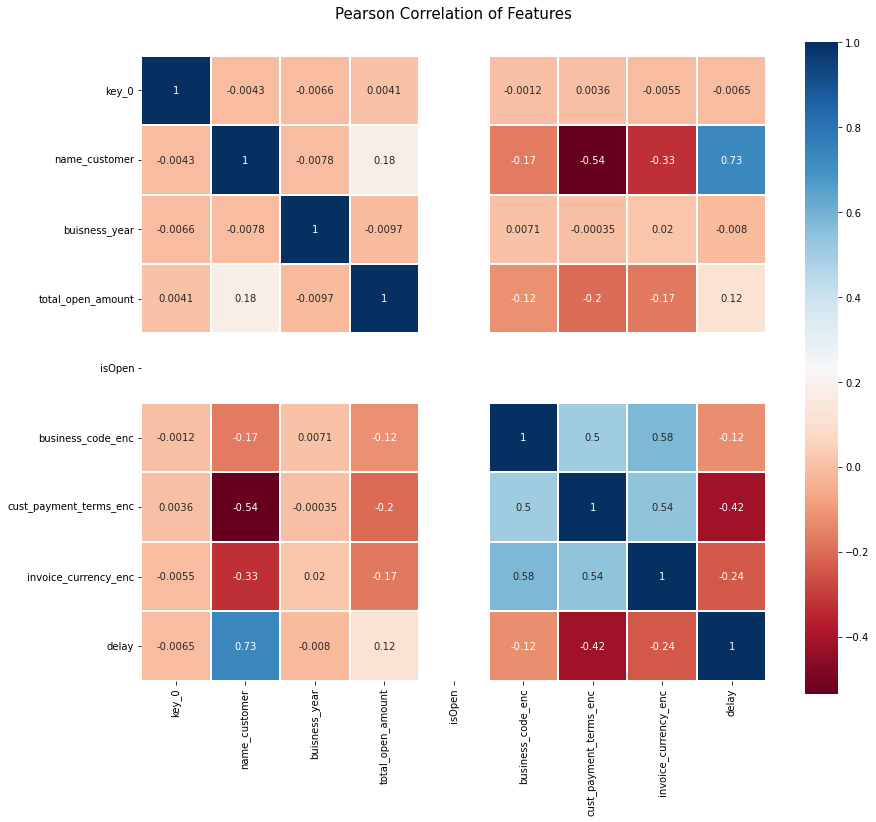

In [50]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [51]:
X_train.drop(['isOpen'], axis =1,inplace=True)
X_val.drop(['isOpen'],axis=1 , inplace=True)
X_test.drop(['isOpen'],axis=1 , inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

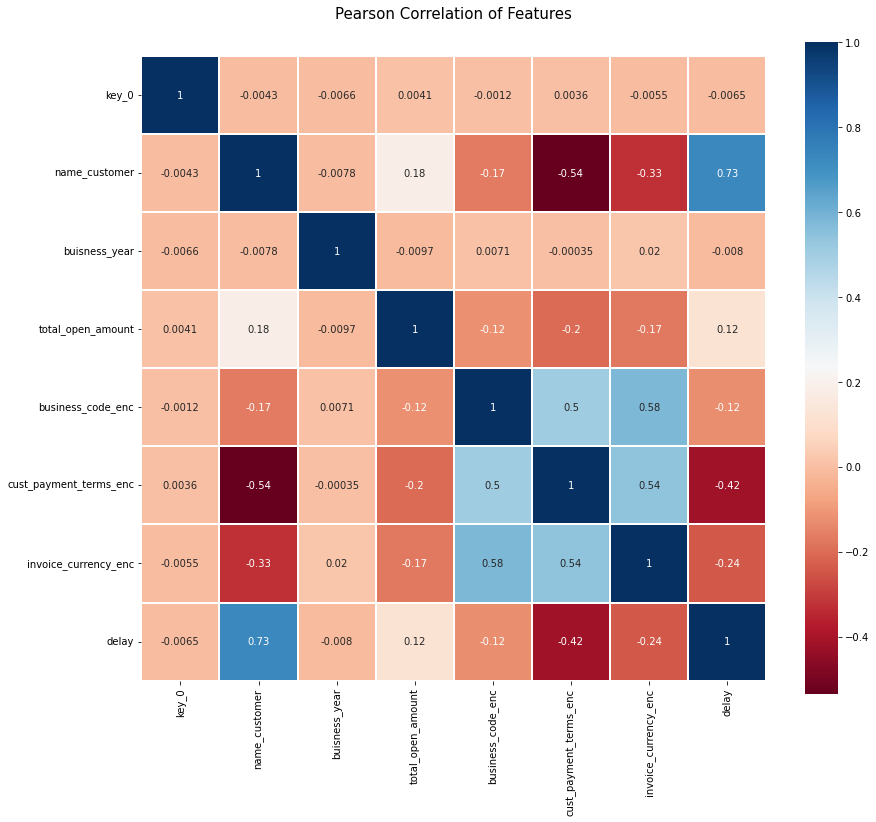

In [52]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# X_train.info()

In [53]:
from sklearn.feature_selection import VarianceThreshold  # calculating variance threshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [54]:
sel.variances_

array([5.82642556e+00, 1.14266628e-01, 1.53932987e+09, 2.18902616e-01,
       8.67779579e+01, 6.75063991e-02])

# MODELLING

### Linear Regression model

In [55]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression(fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=10,
    positive=False,)
base_model.fit(X_train, y_train)

LinearRegression(n_jobs=10, normalize=False)

In [56]:
y_predict = base_model.predict(X_val)

In [57]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_val,y_predict, squared=False)
#print(mse)
rmse=math.sqrt(mse)
print(rmse)

2.4712164864302006


In [58]:
from sklearn.metrics import r2_score
r2_score(y_val, y_predict)

0.7004696400788661

### Tree Based Model

In [59]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(
    criterion='mse',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)

In [60]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5)

In [61]:
y_predict2 = regressor.predict(X_val)

In [62]:
mse=mean_squared_error(y_val,y_predict2, squared=False)
rmse=math.sqrt(mse)
print(rmse)
r2_score(y_val, y_predict2)

3.076998745775051


0.2800423434719572

### SVR Model

In [63]:
from sklearn.svm import SVR
SVRregressor = SVR(kernel='rbf')
SVRregressor.fit(X_train,y_train)

SVR()

In [64]:
y_predict3 = SVRregressor.predict(X_val)

In [65]:
mse=mean_squared_error(y_val,y_predict3, squared=False)
rmse=math.sqrt(mse)
print(rmse)
r2_score(y_val, y_predict3)

3.348964313672466


-0.010275350313455833

### XG Boost Model

In [66]:
from xgboost.sklearn import XGBRegressor
model = XGBRegressor(n_estimators=10, max_depth=10, learning_rate=0.001)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
y_predict4 = regressor.predict(X_val)

In [68]:
mse=mean_squared_error(y_val,y_predict4, squared=False)
rmse=math.sqrt(mse)
print(rmse)
r2_score(y_val, y_predict4)

3.076998745775051


0.2800423434719572

### Comparing the above 3 models

In [69]:
y_predict_test = regressor.predict(X_test)
mse=mean_squared_error(y_test, y_predict_test, squared=False)
rmse=math.sqrt(mse)
print(rmse)

3.0268261645750534


### Performing the operations on main test data i.e where clear date= Null

In [70]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
1,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1
2,U001,0200418007,AM,NaN,2020.0,1.930611e+09,2020-03-11,20200306,20200311,20200326.0,USD,RV,1.0,NaN,3525.59,20200311.0,NAA8,1.930611e+09,1
3,U001,0200739534,OK systems,NaN,2020.0,1.930788e+09,2020-04-15,20200415,20200415,20200430.0,USD,RV,1.0,NaN,121105.65,20200415.0,NAA8,1.930788e+09,1
4,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,USD,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930625e+09,2020-03-10,20200309,20200310,20200325.0,USD,RV,1.0,NaN,13114.99,20200310.0,NAH4,1.930625e+09,1
9996,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930851e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,8899.71,20200503.0,NAH4,1.930851e+09,1
9997,U001,0200148860,DOLLA co,NaN,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,4967.06,20200311.0,NAA8,1.930638e+09,1
9998,U001,0200900909,SYSCO co,NaN,2020.0,1.930702e+09,2020-03-25,20200325,20200325,20200409.0,USD,RV,1.0,NaN,1998.64,20200325.0,NAA8,1.930702e+09,1


In [71]:
test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [72]:
test['customer_name']=test["name_customer"]

In [73]:
diff = set(test['cust_payment_terms'])-set(cust_payment_terms_encoder.classes_)

for items in diff:
    cust_payment_terms_encoder.classes_ = np.append(cust_payment_terms_encoder.classes_,items)
    
test['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(test['cust_payment_terms'])  #performing same on train,val,split
test['invoice_currency_enc'] = invoice_currency_encoder.transform(test['invoice_currency'])  #performing same on train,val,split
test['business_code_enc'] = business_code_encoder.transform(test['business_code'])
test['name_customer'] = test['name_customer'].map(means)
# test['name_customer'].mean()
test['name_customer'].fillna(test['name_customer'].mean(),inplace=True)


In [74]:
test.drop(['doc_id', 'document_create_date','document_create_date.1','baseline_create_date','posting_id','document type','clear_date','isOpen','business_code','invoice_currency','area_business'], axis='columns', inplace=True) #dropping these columns as they dont provide any info about delay   
test 

,cust_number,name_customer,buisness_year,posting_date,due_in_date,total_open_amount,cust_payment_terms,invoice_id,customer_name,cust_payment_terms_enc,invoice_currency_enc,business_code_enc
0,0140105686,3.260870,2020.0,2020-03-30,20200410.0,3299.70,CA10,2.960623e+09,SYSC llc,4,0,0
1,0200744019,1.960000,2020.0,2020-03-19,20200403.0,11173.02,NAA8,1.930659e+09,TARG us,17,1,1
2,0200418007,0.875000,2020.0,2020-03-11,20200326.0,3525.59,NAA8,1.930611e+09,AM,17,1,1
3,0200739534,2.142857,2020.0,2020-04-15,20200430.0,121105.65,NAA8,1.930788e+09,OK systems,17,1,1
4,0200353024,-3.795455,2020.0,2020-04-23,20200426.0,3726.06,NAM2,1.930817e+09,DECA corporation,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0200769623,-2.594225,2020.0,2020-03-10,20200325.0,13114.99,NAH4,1.930625e+09,WAL-MAR in,30,1,1
9996,0200769623,-2.796662,2020.0,2020-05-03,20200518.0,8899.71,NAH4,1.930851e+09,WAL-MAR corporation,30,1,1
9997,0200148860,-0.277778,2020.0,2020-03-11,20200326.0,4967.06,NAA8,1.930638e+09,DOLLA co,17,1,1
9998,0200900909,1.500000,2020.0,2020-03-25,20200409.0,1998.64,NAA8,1.930702e+09,SYSCO co,17,1,1


In [75]:
delay=base_model.predict(test[['cust_payment_terms_enc','invoice_currency_enc','business_code_enc','name_customer','buisness_year','total_open_amount']])
delay

array([29.83318458, 57.30637111, 42.56839642, ..., 45.17912463,
       39.72939493, 41.76941026])

In [76]:
test["delay"]=delay

In [77]:
test['predicted_date']=pd.to_timedelta(test['delay'],unit="D")+pd.to_datetime(test['due_in_date'], format="%Y%m%d")

In [78]:
test['predicted_date']

0      2020-05-09 19:59:47.147366400
1      2020-05-30 07:21:10.463817599
2      2020-05-07 13:38:29.450515200
3      2021-01-22 06:24:31.343443200
4      2020-06-21 22:38:20.343004800
                    ...             
9995   2020-06-06 01:53:44.475763199
9996   2020-07-22 00:05:56.920128000
9997   2020-05-10 04:17:56.367859200
9998   2020-05-18 17:30:19.722124800
9999   2020-06-16 18:27:57.046723200
Name: predicted_date, Length: 10000, dtype: datetime64[ns]

In [79]:
test['due_in_date' ]=pd.to_datetime(test['due_in_date'],format='%Y%m%d')

In [80]:
test["invoice_id"] = test["invoice_id"].astype(float).astype(int)

In [81]:
test

,cust_number,name_customer,buisness_year,posting_date,due_in_date,total_open_amount,cust_payment_terms,invoice_id,customer_name,cust_payment_terms_enc,invoice_currency_enc,business_code_enc,delay,predicted_date
0,0140105686,3.260870,2020.0,2020-03-30,2020-04-10,3299.70,CA10,-2147483648,SYSC llc,4,0,0,29.833185,2020-05-09 19:59:47.147366400
1,0200744019,1.960000,2020.0,2020-03-19,2020-04-03,11173.02,NAA8,1930659387,TARG us,17,1,1,57.306371,2020-05-30 07:21:10.463817599
2,0200418007,0.875000,2020.0,2020-03-11,2020-03-26,3525.59,NAA8,1930610806,AM,17,1,1,42.568396,2020-05-07 13:38:29.450515200
3,0200739534,2.142857,2020.0,2020-04-15,2020-04-30,121105.65,NAA8,1930788296,OK systems,17,1,1,267.267029,2021-01-22 06:24:31.343443200
4,0200353024,-3.795455,2020.0,2020-04-23,2020-04-26,3726.06,NAM2,1930817482,DECA corporation,32,1,1,56.943291,2020-06-21 22:38:20.343004800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0200769623,-2.594225,2020.0,2020-03-10,2020-03-25,13114.99,NAH4,1930624804,WAL-MAR in,30,1,1,73.078987,2020-06-06 01:53:44.475763199
9996,0200769623,-2.796662,2020.0,2020-05-03,2020-05-18,8899.71,NAH4,1930850962,WAL-MAR corporation,30,1,1,65.004131,2020-07-22 00:05:56.920128000
9997,0200148860,-0.277778,2020.0,2020-03-11,2020-03-26,4967.06,NAA8,1930637779,DOLLA co,17,1,1,45.179125,2020-05-10 04:17:56.367859200
9998,0200900909,1.500000,2020.0,2020-03-25,2020-04-09,1998.64,NAA8,1930702251,SYSCO co,17,1,1,39.729395,2020-05-18 17:30:19.722124800


In [82]:
import pickle
pickle.dump(base_model, open('model.pkl', 'wb'))